# Titanic Dataset

In [1]:
import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
%matplotlib inline

pd.option_context("display.max_rows", None, "display.max_columns", None)

## Loading Data and EDA

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Merging the two datasets for easy data manipulation**

In [4]:
df = pd.concat([train_df,test_df],sort=True)

In [5]:
df.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [6]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

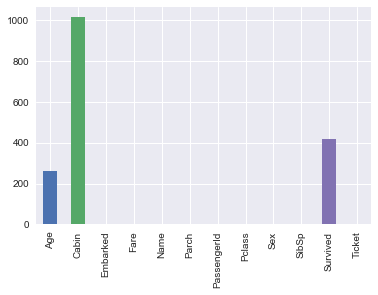

In [7]:
df.isnull().sum().plot.bar()

## Imputing Values

### Extracting Title from Name 

In [8]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [9]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


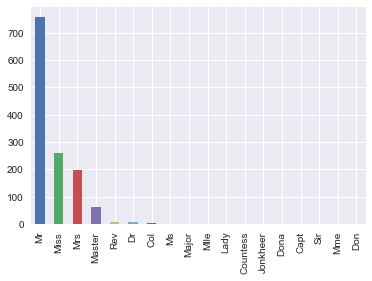

In [10]:
df['Title'].value_counts().plot.bar()

**Using only common titles**

In [11]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

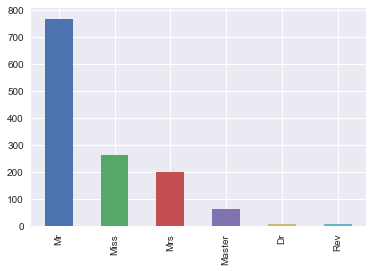

In [12]:
df['Title'].value_counts().plot.bar()

**Imputing Age**

In [13]:
title_ages = dict(df.groupby('Title')['Age'].median())

In [14]:
title_ages

{'Dr': 49.0, 'Master': 4.0, 'Miss': 22.0, 'Mr': 30.0, 'Mrs': 35.5, 'Rev': 41.5}

In [15]:
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

In [16]:
df['Age'].fillna(df['age_med'],inplace=True)

In [17]:
del df['age_med']

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

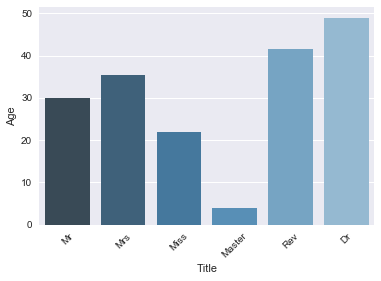

In [18]:
sns.barplot(x='Title',y='Age',data=df,estimator=np.median,ci=None,palette='Blues_d')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

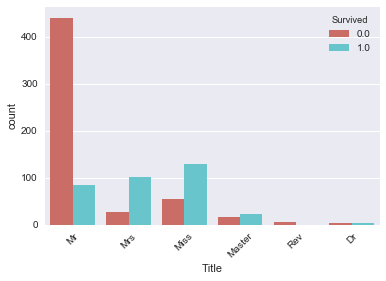

In [19]:
sns.countplot(x='Title',data=df,hue='Survived',palette='hls')
plt.xticks(rotation=45)

**Imputing Fare Values**

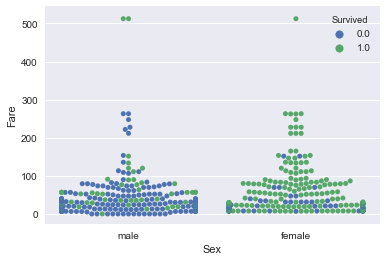

In [20]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df)

In [21]:
class_fares = dict(df.groupby('Pclass')['Fare'].median())

In [22]:
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

In [23]:
df['Fare'].fillna(df['fare_med'],inplace=True)
del df['fare_med']

**Imputing Embarked Values**

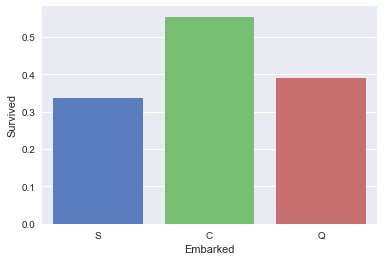

In [24]:
sns.categorical.barplot(x='Embarked', y='Survived', data=df, ci=None, palette='muted')

In [25]:
df['Embarked'].fillna(method='bfill',inplace=True)

## Feature Engineering

In [26]:
df['Family_Size'] = df['Parch'] + df['SibSp']

In [27]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [28]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
count,1309.000000,295,1309,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309,1309,1309.000000
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929,6,NaN
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343,Mr,NaN
freq,NaN,6,915,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11,767,NaN
mean,29.562391,NaN,NaN,33.276193,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN,NaN,0.883881
std,13.165360,NaN,NaN,51.743584,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN,NaN,1.583639
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
25%,22.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
50%,30.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
75%,35.500000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000


**Encoding categorical variables**

In [29]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [30]:
cats = ['Embarked','Title']

for cat in cats:
    df = pd.get_dummies(df,columns=[cat])

## Feature Selection

### Droping columns

In [31]:
#frop the variables that we won't be using
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [32]:
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,7.2500,0,3,1,1,0.0,1,0,0,1,0,0,0,1,0,0
1,38.0,71.2833,0,1,0,1,1.0,1,1,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,0,1,0,0,1,0,0,0
3,35.0,53.1000,0,1,0,1,1.0,1,0,0,1,0,0,0,0,1,0
4,35.0,8.0500,0,3,1,0,0.0,0,0,0,1,0,0,0,1,0,0


## Training the model

### Splitting the data into train and test sets

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train = df[df.Survived.isnull() == False]
X_test = df[df.Survived.isnull()].drop('Survived',axis=1)

In [35]:
X = train.drop('Survived',axis=1)
y = train.Survived

In [36]:
X_train,X_val,y_train,y_val = train_test_split(
    X,y,test_size=0.2,random_state=42)

In [37]:
for ds in [X_train,X_val,X_test]:
    print(ds.shape)

(712, 16)
(179, 16)
(418, 16)


### Create Random Forest model  

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=42)

In [40]:
rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Test Model

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
rf.score(X_val,y_val)

0.8100558659217877

In [43]:
accuracy_score(y_val,rf.predict(X_val))

0.8100558659217877

### Cross validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)

In [46]:
cross_val_score(rf,X,y,cv=5)

array([0.81564246, 0.7877095 , 0.82022472, 0.76966292, 0.83050847])

In [47]:
cross_val_score(rf,X,y,cv=5).mean()

0.8047496140665945

### Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

**Number of estimators and max_depth**

In [49]:
n_estimators = [10,100,1000,2000]
max_depth = [None,5,10,10,20]
rf_params = dict(n_estimators=n_estimators,max_depth=max_depth)

In [50]:
gridCV = GridSearchCV(rf,rf_params,cv=3,verbose=2,n_jobs=-1)

In [51]:
gridCV.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_de

In [52]:
gridCV.best_score_

0.8282828282828283

In [53]:
gridCV.best_params_

{'max_depth': 5, 'n_estimators': 10}

**Leaf size**

In [54]:
leaf_samples = [1,2,3,4,5,6]
rf_params = dict(min_samples_leaf=leaf_samples)

In [55]:
rf = gridCV.best_estimator_

In [56]:
gridCV = GridSearchCV(rf,rf_params,cv=3,verbose=2,n_jobs=-1)

In [57]:
gridCV.fit(X,y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_sampl

In [58]:
gridCV.best_params_

{'min_samples_leaf': 2}

In [59]:
gridCV.best_score_

0.8316498316498316

**To bag or not to bag**

In [60]:
max_features = [5,8,10,12,None]
bootstrap = [False,True]
rf_params = dict(max_features=max_features,bootstrap=bootstrap)

In [61]:
rf = gridCV.best_estimator_

In [62]:
gridCV = GridSearchCV(rf,rf_params,cv=3,verbose=2,n_jobs=-1)

In [63]:
gridCV.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap

In [64]:
gridCV.best_params_

{'bootstrap': False, 'max_features': 8}

In [65]:
gridCV.best_score_

0.835016835016835

In [74]:
rf = gridCV.best_estimator_

In [75]:
cross_val_score(rf,X,y,cv=5).mean()

0.8305865301173458

## Making predictions for the Test set

In [76]:
test_df['Survived'] = rf.predict(X_test)

In [77]:
solution = test_df[['PassengerId','Survived']]

In [78]:
solution['Survived'] = solution['Survived'].apply(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
